Using the Titanic dataset from Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

Name (str) - Name of the passenger

Pclass (int) - Ticket class

Sex (str) - Sex of the passenger

Age (float) - Age in years

SibSp (int) - Number of siblings and spouses aboard

Parch (int) - Number of parents and children aboard

Ticket (str) - Ticket number

Fare (float) - Passenger fare

Cabin (str) - Cabin number

Embarked (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##  Exploring Countinuous features

In [5]:
titanic.groupby(by='Survived').mean()

C:\Users\konrad-lisewski\AppData\Local\Temp\ipykernel_24032\292699847.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby(by='Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [6]:
titanic.groupby(titanic['Age'].isnull()).mean()

C:\Users\konrad-lisewski\AppData\Local\Temp\ipykernel_24032\2293462091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby(titanic['Age'].isnull()).mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


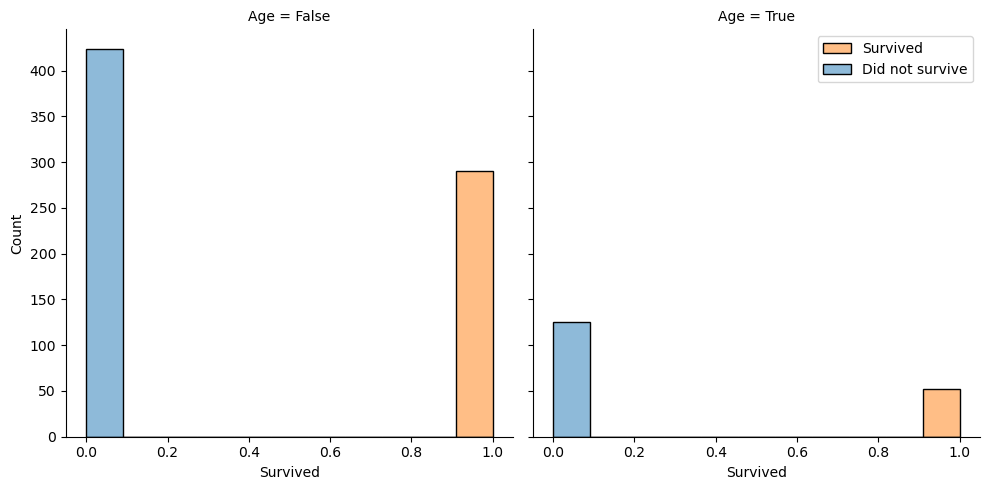

In [7]:
sns.displot(data=titanic, col=titanic['Age'].isnull(), x='Survived', hue='Survived', legend=False)
plt.legend([ 'Survived','Did not survive'])
plt.show()

In [8]:
sns

<module 'seaborn' from 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

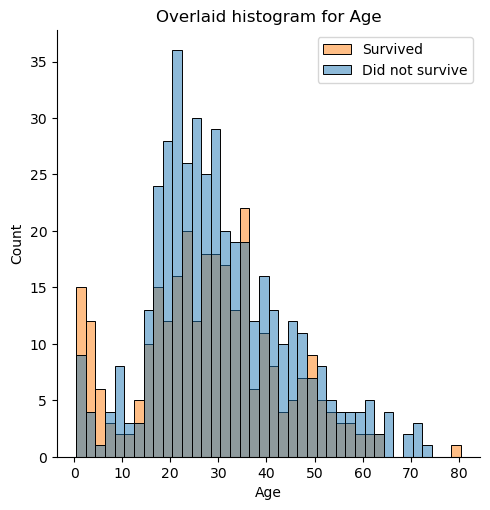

In [9]:
sns.displot(data=titanic, x='Age', hue='Survived', binwidth=2, legend=False)
plt.title('Overlaid histogram for Age')
plt.legend([ 'Survived','Did not survive'])
plt.show()

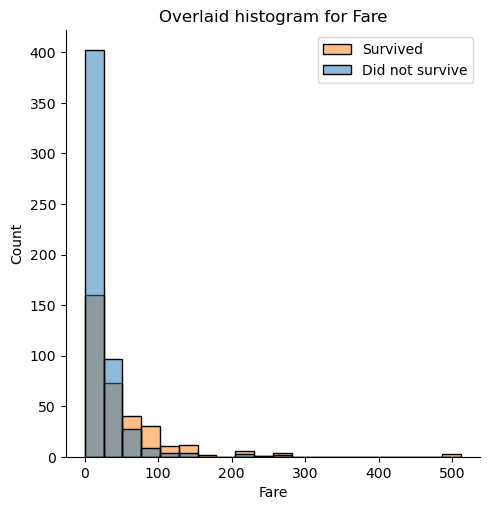

In [10]:
sns.displot(data=titanic, x='Fare', hue='Survived', bins=20, legend=False)
plt.title('Overlaid histogram for Fare')
plt.legend(['Survived', 'Did not survive'])
plt.show()

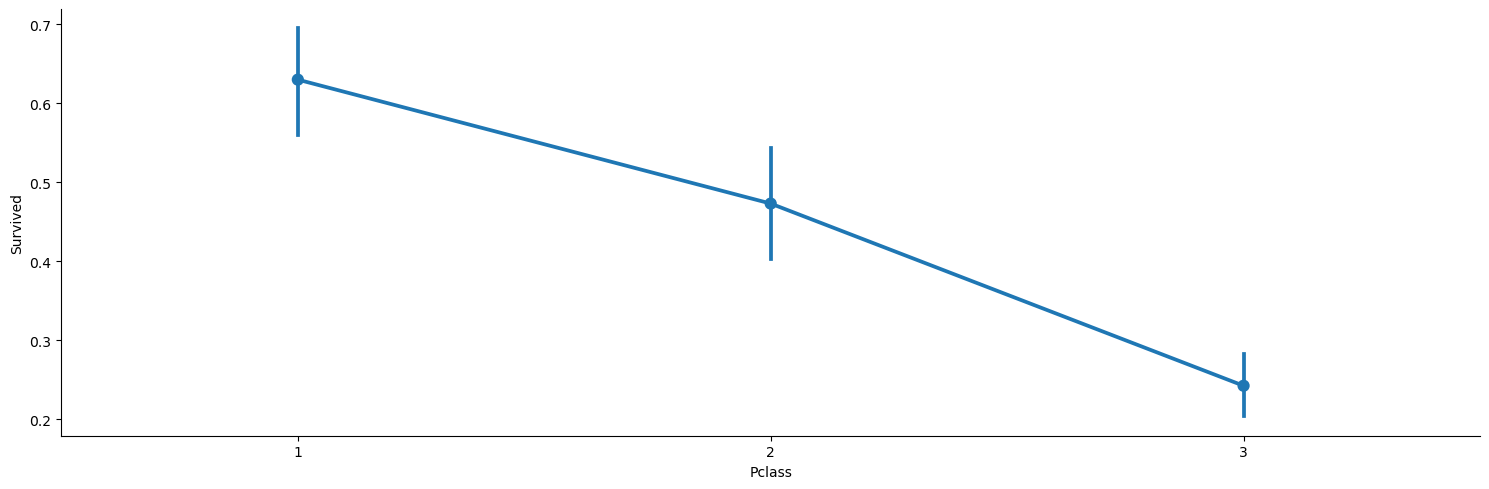

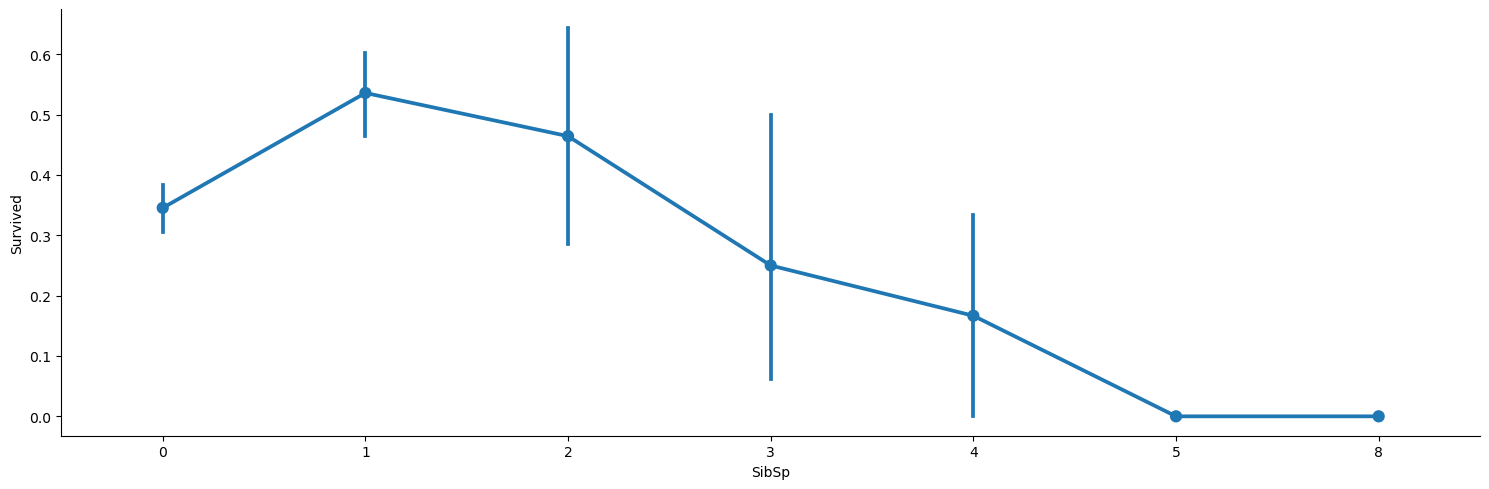

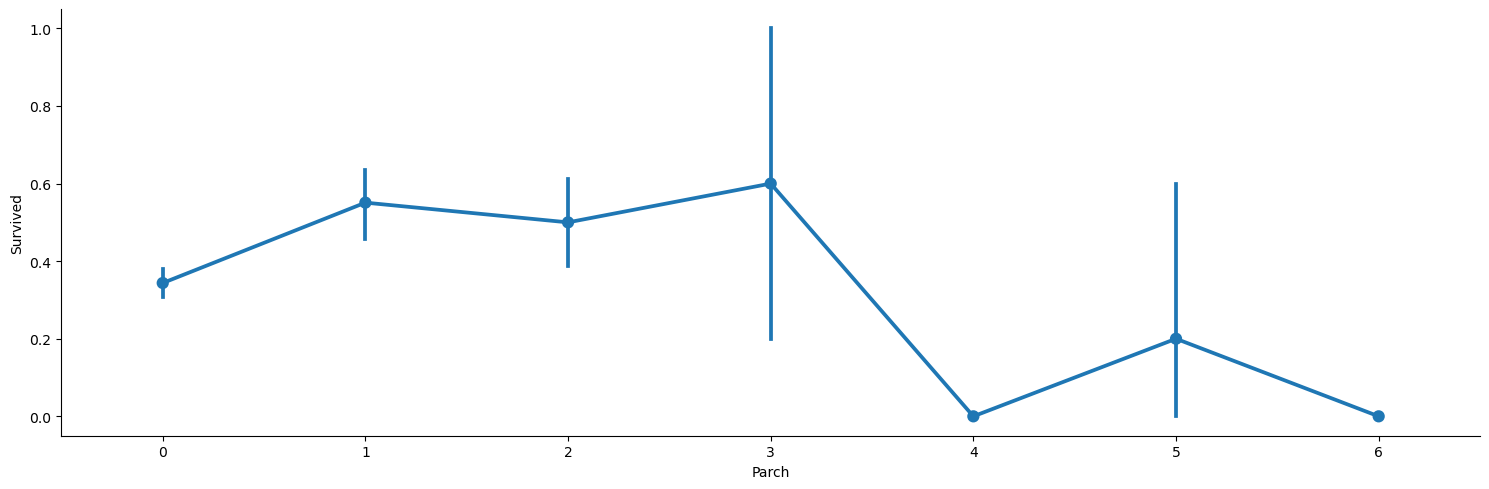

In [11]:
for col in ['Pclass','SibSp','Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=3)

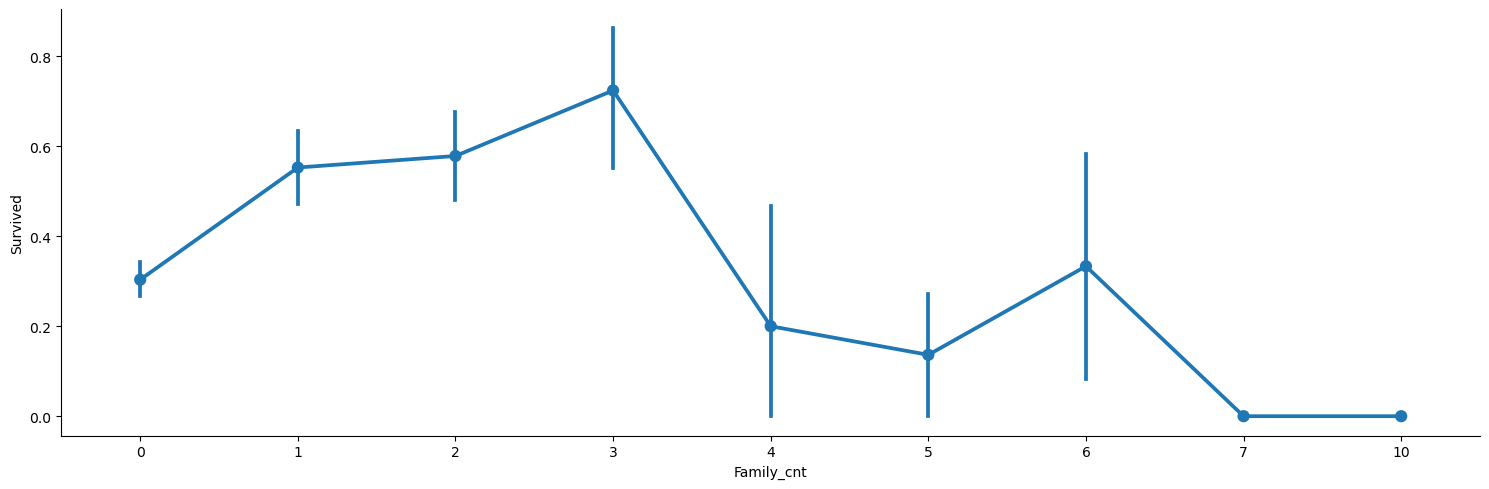

In [12]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=3, )

## Cleaning continuous features

In [13]:
titanic.drop(['PassengerId','SibSp','Parch'], axis=1, inplace=True)

In [14]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

## Exploring categorical features

In [15]:
titanic[['Cabin','Sex','Embarked']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cabin     204 non-null    object
 1   Sex       891 non-null    object
 2   Embarked  889 non-null    object
dtypes: object(3)
memory usage: 21.0+ KB


In [16]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

### Create `Cabin_ind`

In [17]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)
titanic.drop('Cabin', axis=1, inplace=True )
titanic['Cabin_ind'].head(15)

0     0
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    1
12    0
13    0
14    0
Name: Cabin_ind, dtype: int32

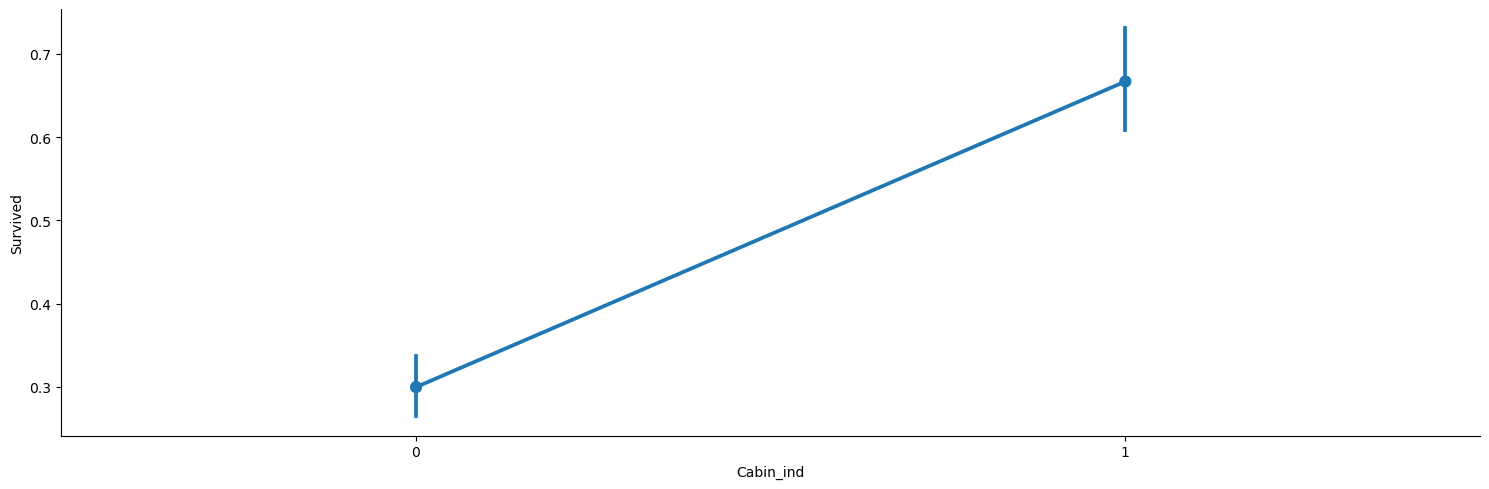

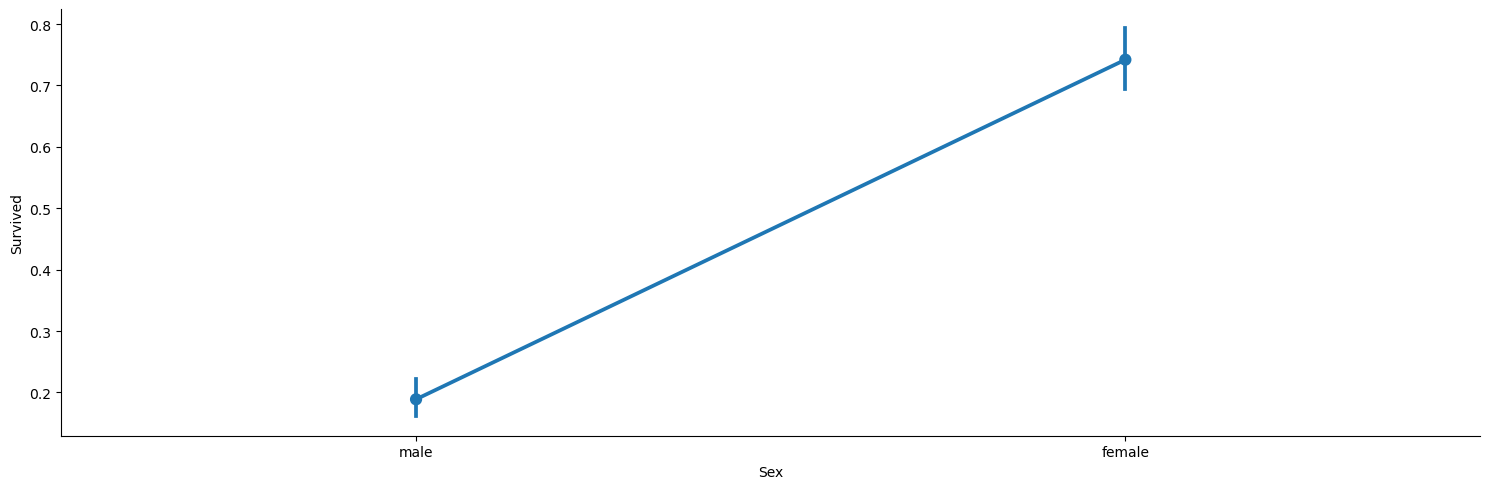

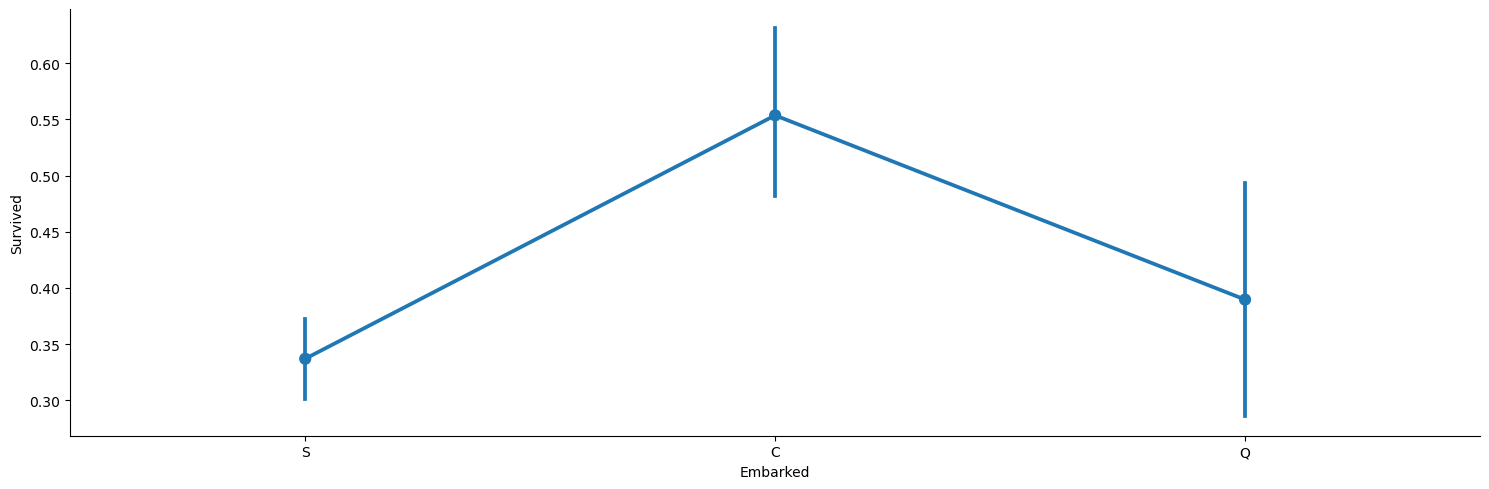

In [18]:
for i in ['Cabin_ind','Sex','Embarked']:
    sns.catplot(data=titanic, y='Survived', x=i, kind='point', aspect=3)

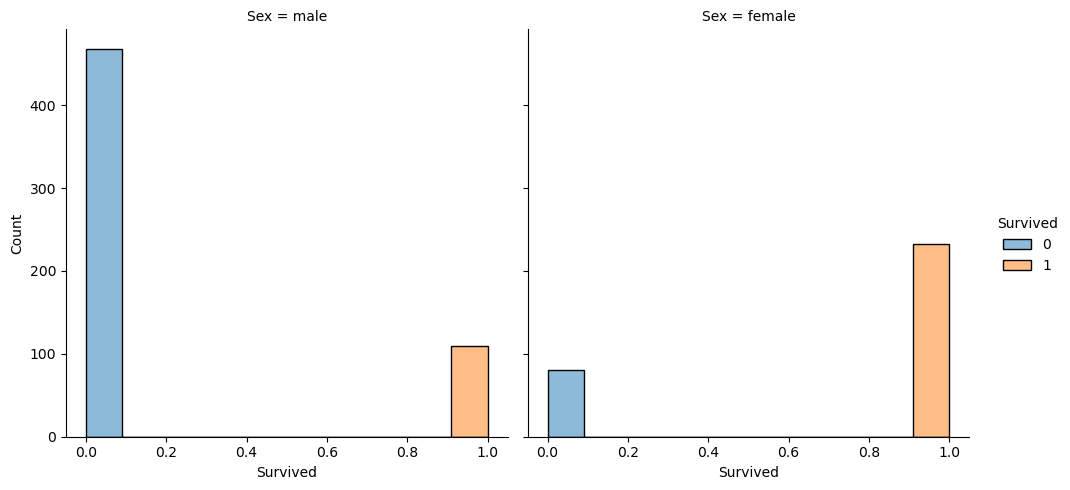

In [19]:
sns.displot(data=titanic, col='Sex', x='Survived', hue='Survived')

In [20]:
titanic.pivot_table(values='Survived', index='Sex',columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [21]:
titanic.pivot_table(values='Survived', index='Cabin_ind',columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


## Cleaning categorical features

### Drop `Embarked`

In [22]:
titanic.drop('Embarked', axis=1, inplace=True)

### Convert `Sex` to numeric

In [23]:
gender_num = {'male':0, 'female':1}

titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head(15)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,1,1
4,0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,0,0
5,0,3,"Moran, Mr. James",0,29.699118,330877,8.4583,0,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.000000,17463,51.8625,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,349909,21.0750,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,347742,11.1333,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,237736,30.0708,1,0


### Drop `Name` and `Ticket`

In [24]:
titanic.drop(['Name','Ticket'], axis=1, inplace=True)

## Final titanic data

In [25]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


# Model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [29]:
for i in (X_train, X_test, X_val):
    print(i.shape)

(534, 6)
(178, 6)
(179, 6)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
def print_results(results):
    print('Best params: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    std = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, std, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3), params))
    

In [32]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators':[5,50,100],
    'max_depth':[2,10,20,None]
}
cv = GridSearchCV(rf,parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

Best params: {'max_depth': 10, 'n_estimators': 100}

0.785 (+/-0.09) for {'max_depth': 2, 'n_estimators': 5}
0.807 (+/-0.057) for {'max_depth': 2, 'n_estimators': 50}
0.785 (+/-0.131) for {'max_depth': 2, 'n_estimators': 100}
0.79 (+/-0.067) for {'max_depth': 10, 'n_estimators': 5}
0.818 (+/-0.067) for {'max_depth': 10, 'n_estimators': 50}
0.828 (+/-0.048) for {'max_depth': 10, 'n_estimators': 100}
0.813 (+/-0.042) for {'max_depth': 20, 'n_estimators': 5}
0.809 (+/-0.034) for {'max_depth': 20, 'n_estimators': 50}
0.811 (+/-0.034) for {'max_depth': 20, 'n_estimators': 100}
0.803 (+/-0.052) for {'max_depth': None, 'n_estimators': 5}
0.803 (+/-0.033) for {'max_depth': None, 'n_estimators': 50}
0.801 (+/-0.022) for {'max_depth': None, 'n_estimators': 100}


## Model selection

In [33]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf1.fit(X_train, y_train)

rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(X_train, y_train)

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred), 3)
    print('Max Depth: {} / % # of est: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                          mdl.n_estimators,
                                                                          accuracy,
                                                                          precision,
                                                                          recall))

Max Depth: 10 / % # of est: 50 -- A: 0.832 / P: 0.848 / R: 0.737
Max Depth: 10 / % # of est: 100 -- A: 0.821 / P: 0.844 / R: 0.711
Max Depth: None / % # of est: 100 -- A: 0.832 / P: 0.829 / R: 0.763


In [35]:
y_pred = rf1.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
print('Max Depth: {} / % # of est: {} -- A: {} / P: {} / R: {}'.format(rf1.max_depth,
                                                                          rf1.n_estimators,
                                                                          accuracy,
                                                                          precision,
                                                                          recall))

Max Depth: 10 / % # of est: 50 -- A: 0.798 / P: 0.746 / R: 0.677
